In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn_data.csv')

In [3]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


#### Null values / Missing values and how to handle them

In [4]:
df.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

We have 3 columns in which there are missing values:
- gender
- maximum_days_inactive
- churn

Handling null values?

- fill the null value with - mean, median, mode - fillna()
- delete the rows/ columns

- for filling the values:
    - for categorical columns, we usually fill the values with the mode (most frequent value).
    - We also can fill the null values with all the categories in their respective ratios.
    - We can also use the least frequent value to fill the missing value to increase the variance
    
    - For numerical data, we either choose mean or median

In [5]:
df.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [6]:
# % of the missing data in each column

df.isna().sum() / len(df) * 100

year                      0.00
customer_id               0.00
phone_no                  0.00
gender                    1.20
age                       0.00
no_of_days_subscribed     0.00
multi_screen              0.00
mail_subscribed           0.00
weekly_mins_watched       0.00
minimum_daily_mins        0.00
maximum_daily_mins        0.00
weekly_max_night_mins     0.00
videos_watched            0.00
maximum_days_inactive     1.40
customer_support_calls    0.00
churn                     1.75
dtype: float64

- Deleting columns
    - If any column has more than 30-40% data missing, we delete that column
    - This value of 30-40% is not a hard rule. It depends on the requirement and the data

- Deleting rows:
    - We avoid deleting rows. Why?
    - We lose data if we delete the rows

In [7]:
# gender

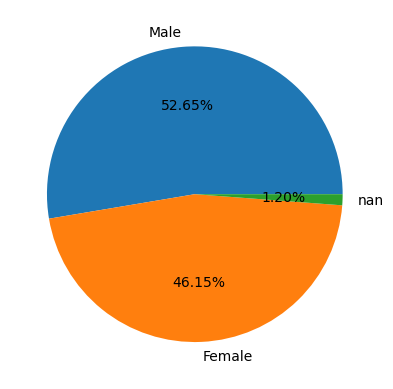

In [8]:
plt.pie(df['gender'].value_counts(dropna=False), 
        labels=df['gender'].value_counts(dropna=False).index,
       autopct='%.2f%%')
plt.show()

In [9]:
df['gender'].value_counts(dropna=False)

Male      1053
Female     923
NaN         24
Name: gender, dtype: int64

- For gender column, we should fill the value with:
    - mode - most frequent value - male
    - least frequent value - female
    - respective ratios

In [10]:
# we use the mode

In [11]:
df['gender'].mode()

0    Male
Name: gender, dtype: object

In [12]:
df['gender'].mode().loc[0]

'Male'

In [13]:
df['gender'].value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [16]:
df['gender'].value_counts().idxmax()

'Male'

In [17]:
df.fillna({'gender': df['gender'].value_counts().idxmax()})

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [18]:
df.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [19]:
# df.fillna({'gender': df['gender'].value_counts().idxmax()}, inplace=True)

In [20]:
df1 = df.fillna({'gender': df['gender'].value_counts().idxmax()})

In [21]:
df1

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [22]:
df1.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [23]:
# maximum_days_inactive

In [24]:
df['maximum_days_inactive']

0       4.0
1       3.0
2       4.0
3       3.0
4       3.0
       ... 
1995    4.0
1996    3.0
1997    5.0
1998    NaN
1999    3.0
Name: maximum_days_inactive, Length: 2000, dtype: float64

In [25]:
df.nunique()

year                         1
customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

In [26]:
df['maximum_days_inactive'].median()

3.0

In [27]:
df['maximum_days_inactive'].mean()

3.2505070993914806

In [28]:
# We choose to fill the values with median

In [30]:
df1.fillna({'maximum_days_inactive': df['maximum_days_inactive'].median()}, inplace=True)

In [31]:
df1

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [32]:
df1.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive      0
customer_support_calls     0
churn                     35
dtype: int64

In [33]:
# churn

In [34]:
df['churn'].value_counts(dropna=False)

0.0    1703
1.0     262
NaN      35
Name: churn, dtype: int64

In [35]:
df['churn'].value_counts(dropna=False, normalize=True)

0.0    0.8515
1.0    0.1310
NaN    0.0175
Name: churn, dtype: float64

In [36]:
# 1.0 => leave
# 0.0 => stay

In [39]:
df1[df1['churn'].isna()]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
81,2015,129137,335-7257,Female,36,92,no,yes,276.00,12.7,31.28,96,3,3.0,2,NaN
82,2015,129487,377-9178,Female,39,103,no,no,240.30,9.7,27.23,97,2,3.0,0,NaN
120,2015,148624,410-5713,Male,32,66,no,yes,262.05,8.9,29.70,98,2,3.0,1,NaN
121,2015,148676,370-7546,Male,37,87,no,no,235.20,7.6,26.66,77,6,3.0,1,NaN
156,2015,165361,380-8727,Female,37,99,no,no,173.25,11.5,19.64,98,7,4.0,7,NaN
157,2015,165883,358-9095,Female,28,128,no,no,356.85,13.9,40.44,68,4,4.0,1,NaN
194,2015,184762,357-1909,Male,31,151,yes,no,327.00,12.4,37.06,95,1,4.0,0,NaN
195,2015,184815,397-7500,Male,40,105,no,yes,211.80,11.4,24.00,101,2,4.0,1,NaN
228,2015,200466,374-1551,Male,38,80,no,no,177.15,8.2,20.08,86,6,3.0,1,NaN
290,2015,230769,366-7247,Male,60,93,yes,no,325.35,17.5,36.87,110,5,5.0,1,NaN


In [38]:
len(df[df['churn'].isna()])

35

In [40]:
# We will fill it with 1.0

In [41]:
df['churn'].value_counts().idxmin()

1.0

In [42]:
df1.fillna({'churn': df['churn'].value_counts().idxmin()}, inplace=True)

In [43]:
df1

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [44]:
df1.isna().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [47]:
df1['churn'].astype(int)

0       0
1       0
2       1
3       0
4       0
       ..
1995    1
1996    0
1997    0
1998    0
1999    1
Name: churn, Length: 2000, dtype: int32

In [48]:
df1['churn'].astype(int).astype(object)

0       0
1       0
2       1
3       0
4       0
       ..
1995    1
1996    0
1997    0
1998    0
1999    1
Name: churn, Length: 2000, dtype: object

In [49]:
df1['churn'] = df1['churn'].astype(int)

In [50]:
df1

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [52]:
df['churn'].value_counts(dropna=False)

0.0    1703
1.0     262
NaN      35
Name: churn, dtype: int64

In [53]:
df['churn'].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [54]:
df['churn'].value_counts().sum()

1965

In [55]:
df['churn'].value_counts(normalize=True)

0.0    0.866667
1.0    0.133333
Name: churn, dtype: float64

In [56]:
35 * 0.866667

30.333344999999998

In [57]:
35 * 0.133333

4.666655

In [58]:
df['churn'].value_counts(normalize=True) * 35

0.0    30.333333
1.0     4.666667
Name: churn, dtype: float64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

<Axes: xlabel='churn', ylabel='count'>

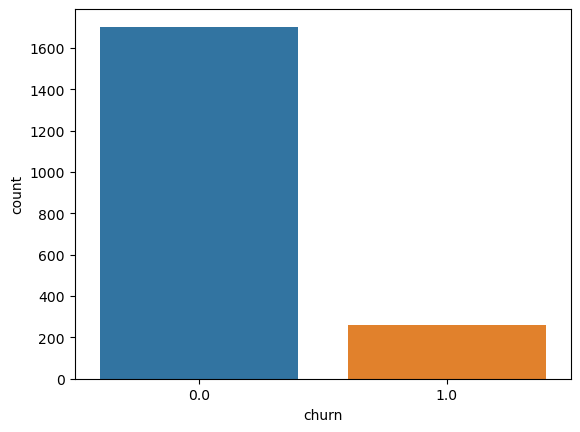

In [60]:
sns.countplot(x='churn', data=df)

Let's delete the columns that may not be required or are not important

In [62]:
df1.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0


In [63]:
cols_to_delete = ['year', 'phone_no', 'mail_subscribed']

In [64]:
df2 = df1.drop(cols_to_delete, axis=1)

In [65]:
df2.head()

,customer_id,gender,age,no_of_days_subscribed,multi_screen,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,Female,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,Female,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,Female,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,Female,24,131,no,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,Female,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0


In [66]:
df2.isna().sum()

customer_id               0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

#### Encoding

In [67]:
df2.head()

,customer_id,gender,age,no_of_days_subscribed,multi_screen,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,Female,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,Female,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,Female,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,Female,24,131,no,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,Female,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0


In [68]:
# It is done to encode the categorical column to numerical column

In [69]:
# get_dummies

In [70]:
# gender column encoding

In [72]:
df2['gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
1995    Female
1996      Male
1997      Male
1998      Male
1999      Male
Name: gender, Length: 2000, dtype: object

In [73]:
df2['gender'].get_dummies()

AttributeError: 'Series' object has no attribute 'get_dummies'

In [74]:
pd.get_dummies(df2['gender'])

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,0,1
1998,0,1


In [75]:
gender_dummies = pd.get_dummies(df2['gender'])

In [76]:
# combine df2 and gender_dummies

In [77]:
# use concat

In [78]:
pd.concat([df2, gender_dummies], axis=1)

,customer_id,gender,age,no_of_days_subscribed,multi_screen,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,Female,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,Female,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,Female,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,Female,24,131,no,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,Female,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,no,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,Male,45,127,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,Male,53,94,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,Male,40,94,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [79]:
df3 = pd.concat([df2, gender_dummies], axis=1)

In [80]:
df3

,customer_id,gender,age,no_of_days_subscribed,multi_screen,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,Female,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,Female,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,Female,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,Female,24,131,no,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,Female,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,no,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,Male,45,127,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,Male,53,94,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,Male,40,94,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [81]:
df3.columns

Index(['customer_id', 'gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn', 'Female', 'Male'],
      dtype='object')

In [82]:
# Now, delete the gender column

In [83]:
df3.drop(['gender'], axis=1, inplace=True)

In [84]:
df3

,customer_id,age,no_of_days_subscribed,multi_screen,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,24,131,no,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,54,75,no,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,45,127,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,53,94,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,40,94,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2000 non-null   int64  
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   object 
 4   weekly_mins_watched     2000 non-null   float64
 5   minimum_daily_mins      2000 non-null   float64
 6   maximum_daily_mins      2000 non-null   float64
 7   weekly_max_night_mins   2000 non-null   int64  
 8   videos_watched          2000 non-null   int64  
 9   maximum_days_inactive   2000 non-null   float64
 10  customer_support_calls  2000 non-null   int64  
 11  churn                   2000 non-null   int32  
 12  Female                  2000 non-null   uint8  
 13  Male                    2000 non-null   uint8  
dtypes: float64(4), int32(1), int64(6), objec

In [86]:
df3['multi_screen']

0       no
1       no
2       no
3       no
4       no
        ..
1995    no
1996    no
1997    no
1998    no
1999    no
Name: multi_screen, Length: 2000, dtype: object

In [87]:
df3['multi_screen'].value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

In [88]:
pd.get_dummies(df3['multi_screen'])

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [89]:
# We need to prefix 'multi_screen' to the column names 'no' and 'yes' for understanding

In [90]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
 

In [91]:
pd.get_dummies(df3['multi_screen'], prefix='multi_screen', prefix_sep='_')

,multi_screen_no,multi_screen_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [92]:
multi_screen_dummies = pd.get_dummies(df3['multi_screen'], prefix='multi_screen', prefix_sep='_')

In [93]:
multi_screen_dummies

,multi_screen_no,multi_screen_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [99]:
df4 = pd.concat([df3, multi_screen_dummies], axis=1)

In [100]:
df4

,customer_id,age,no_of_days_subscribed,multi_screen,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
0,100198,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
1,100643,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0
2,100756,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0
3,101595,24,131,no,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0
4,101653,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,54,75,no,182.25,11.3,20.66,97,5,4.0,2,1,1,0,1,0
1996,998086,45,127,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1,1,0
1997,998474,53,94,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1,1,0
1998,998934,40,94,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1,1,0


In [101]:
# Delete 'multi_screen' column

In [102]:
df4.drop(['multi_screen'], axis=1, inplace=True)

In [103]:
df4

,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
0,100198,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
1,100643,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0
2,100756,65,126,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0
3,101595,24,131,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0
4,101653,40,191,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,54,75,182.25,11.3,20.66,97,5,4.0,2,1,1,0,1,0
1996,998086,45,127,273.45,9.3,30.99,116,3,3.0,1,0,0,1,1,0
1997,998474,53,94,128.85,15.6,14.60,110,16,5.0,0,0,0,1,1,0
1998,998934,40,94,178.05,10.4,20.18,100,6,3.0,3,0,0,1,1,0


In [104]:
df4.set_index('customer_id')

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
customer_id,,,,,,,,,,,,,,
100198,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
100643,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0
100756,65,126,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0
101595,24,131,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0
101653,40,191,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997132,54,75,182.25,11.3,20.66,97,5,4.0,2,1,1,0,1,0
998086,45,127,273.45,9.3,30.99,116,3,3.0,1,0,0,1,1,0
998474,53,94,128.85,15.6,14.60,110,16,5.0,0,0,0,1,1,0


In [105]:
df4

,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
0,100198,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
1,100643,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0
2,100756,65,126,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0
3,101595,24,131,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0
4,101653,40,191,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,54,75,182.25,11.3,20.66,97,5,4.0,2,1,1,0,1,0
1996,998086,45,127,273.45,9.3,30.99,116,3,3.0,1,0,0,1,1,0
1997,998474,53,94,128.85,15.6,14.60,110,16,5.0,0,0,0,1,1,0
1998,998934,40,94,178.05,10.4,20.18,100,6,3.0,3,0,0,1,1,0


In [106]:
df5 = df4.set_index('customer_id')

In [107]:
df5

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
customer_id,,,,,,,,,,,,,,
100198,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
100643,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0
100756,65,126,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0
101595,24,131,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0
101653,40,191,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997132,54,75,182.25,11.3,20.66,97,5,4.0,2,1,1,0,1,0
998086,45,127,273.45,9.3,30.99,116,3,3.0,1,0,0,1,1,0
998474,53,94,128.85,15.6,14.60,110,16,5.0,0,0,0,1,1,0


In [108]:
# We can delete the duplicate customer id

In [110]:
df2

,customer_id,gender,age,no_of_days_subscribed,multi_screen,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,Female,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,Female,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,Female,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,Female,24,131,no,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,Female,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,no,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,Male,45,127,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,Male,53,94,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,Male,40,94,no,178.05,10.4,20.18,100,6,3.0,3,0


In [111]:
df2['gender'].map({'Female': 0, 'Male': 1})

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    1
1997    1
1998    1
1999    1
Name: gender, Length: 2000, dtype: int64

In [112]:
# df2['gender'] = df2['gender'].map({'Female': 0, 'Male': 1})

# This will overwrite the gender column
# Female => 0
# Male => 1

In [113]:
# Correlaion

In [114]:
df4.head()

,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
0,100198,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
1,100643,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0
2,100756,65,126,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0
3,101595,24,131,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0
4,101653,40,191,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0


In [115]:
df4.corr()

,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
customer_id,1.000000,0.023830,-0.011457,-0.013830,0.033733,-0.013834,0.009713,0.063967,0.047070,-0.036009,-0.081924,0.012224,-0.012224,0.037957,-0.037957
age,0.023830,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.013076,0.006334,0.000618,0.009222,0.008814,-0.008814,-0.002835,0.002835
no_of_days_subscribed,-0.011457,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.019338,0.013419,0.002344,0.001785,-0.001785,-0.033423,0.033423
weekly_mins_watched,-0.013830,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.014018,-0.036848,0.164291,-0.002754,0.002754,-0.062180,0.062180
minimum_daily_mins,0.033733,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.063259,-0.013182,0.013182,-0.049270,0.049270
maximum_daily_mins,-0.013834,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.164292,-0.002742,0.002742,-0.062178,0.062178
weekly_max_night_mins,0.009713,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.001123,-0.033571,0.033571,-0.033932,0.033932
videos_watched,0.063967,0.013076,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.027308,-0.027563,0.027563,-0.029931,0.029931
maximum_days_inactive,0.047070,0.006334,0.019338,-0.014018,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044858,-0.027430,0.027430,-0.031440,0.031440
customer_support_calls,-0.036009,0.000618,0.013419,-0.036848,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.199488,-0.007537,0.007537,0.005483,-0.005483


In [116]:
df5

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
customer_id,,,,,,,,,,,,,,
100198,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
100643,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0
100756,65,126,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0
101595,24,131,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0
101653,40,191,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997132,54,75,182.25,11.3,20.66,97,5,4.0,2,1,1,0,1,0
998086,45,127,273.45,9.3,30.99,116,3,3.0,1,0,0,1,1,0
998474,53,94,128.85,15.6,14.60,110,16,5.0,0,0,0,1,1,0


In [117]:
df5.corr()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
age,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.013076,0.006334,0.000618,0.009222,0.008814,-0.008814,-0.002835,0.002835
no_of_days_subscribed,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.019338,0.013419,0.002344,0.001785,-0.001785,-0.033423,0.033423
weekly_mins_watched,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.014018,-0.036848,0.164291,-0.002754,0.002754,-0.062180,0.062180
minimum_daily_mins,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.063259,-0.013182,0.013182,-0.049270,0.049270
maximum_daily_mins,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.164292,-0.002742,0.002742,-0.062178,0.062178
weekly_max_night_mins,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.001123,-0.033571,0.033571,-0.033932,0.033932
videos_watched,0.013076,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.027308,-0.027563,0.027563,-0.029931,0.029931
maximum_days_inactive,0.006334,0.019338,-0.014018,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044858,-0.027430,0.027430,-0.031440,0.031440
customer_support_calls,0.000618,0.013419,-0.036848,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.199488,-0.007537,0.007537,0.005483,-0.005483
churn,0.009222,0.002344,0.164291,0.063259,0.164292,0.001123,-0.027308,0.044858,0.199488,1.000000,0.008277,-0.008277,-0.238210,0.238210


In [118]:
help(df5.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1, numeric_only: 'bool | lib.NoDefault' = <no_default>) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid resul

In [119]:
df5.columns

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn', 'Female', 'Male', 'multi_screen_no', 'multi_screen_yes'],
      dtype='object')

In [120]:
df6 = df5[['age', 'no_of_days_subscribed', 'Female', 'Male', 'customer_support_calls', 'videos_watched']]

In [121]:
df6

,age,no_of_days_subscribed,Female,Male,customer_support_calls,videos_watched
customer_id,,,,,,
100198,36,62,1,0,1,1
100643,39,149,1,0,2,3
100756,65,126,1,0,5,1
101595,24,131,1,0,3,4
101653,40,191,1,0,1,7
...,...,...,...,...,...,...
997132,54,75,1,0,2,5
998086,45,127,0,1,1,3
998474,53,94,0,1,0,16


In [122]:
df6.corr()

,age,no_of_days_subscribed,Female,Male,customer_support_calls,videos_watched
age,1.000000,0.038822,0.008814,-0.008814,0.000618,0.013076
no_of_days_subscribed,0.038822,1.000000,0.001785,-0.001785,0.013419,0.019414
Female,0.008814,0.001785,1.000000,-1.000000,-0.007537,-0.027563
Male,-0.008814,-0.001785,-1.000000,1.000000,0.007537,0.027563
customer_support_calls,0.000618,0.013419,-0.007537,0.007537,1.000000,-0.001201
videos_watched,0.013076,0.019414,-0.027563,0.027563,-0.001201,1.000000


In [123]:
df5.corr()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
age,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.013076,0.006334,0.000618,0.009222,0.008814,-0.008814,-0.002835,0.002835
no_of_days_subscribed,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.019338,0.013419,0.002344,0.001785,-0.001785,-0.033423,0.033423
weekly_mins_watched,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.014018,-0.036848,0.164291,-0.002754,0.002754,-0.062180,0.062180
minimum_daily_mins,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.063259,-0.013182,0.013182,-0.049270,0.049270
maximum_daily_mins,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.164292,-0.002742,0.002742,-0.062178,0.062178
weekly_max_night_mins,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.001123,-0.033571,0.033571,-0.033932,0.033932
videos_watched,0.013076,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.027308,-0.027563,0.027563,-0.029931,0.029931
maximum_days_inactive,0.006334,0.019338,-0.014018,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044858,-0.027430,0.027430,-0.031440,0.031440
customer_support_calls,0.000618,0.013419,-0.036848,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.199488,-0.007537,0.007537,0.005483,-0.005483
churn,0.009222,0.002344,0.164291,0.063259,0.164292,0.001123,-0.027308,0.044858,0.199488,1.000000,0.008277,-0.008277,-0.238210,0.238210


In [124]:
# heatmap

<Axes: >

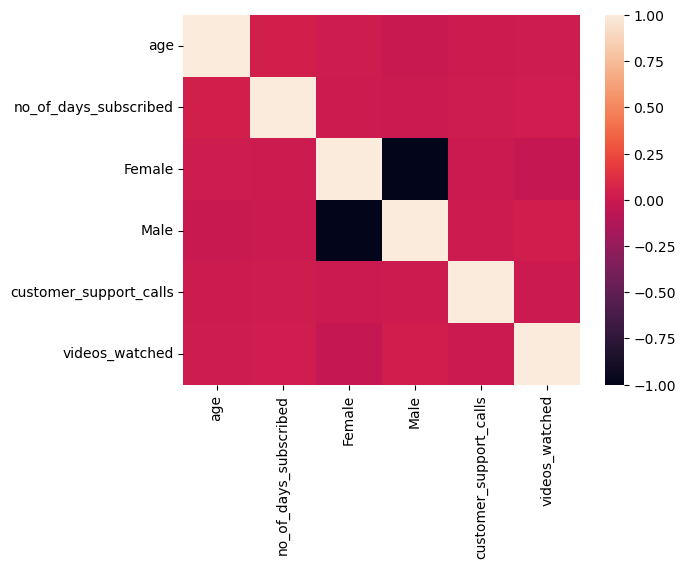

In [125]:
sns.heatmap(df6.corr())

<Axes: >

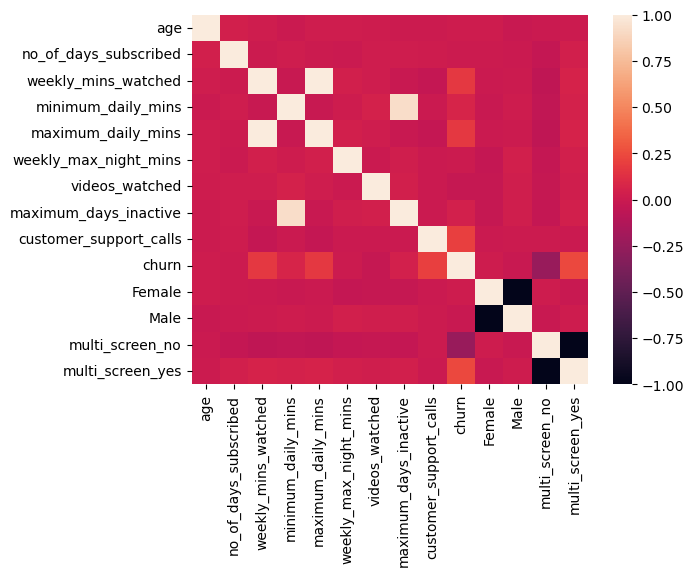

In [126]:
sns.heatmap(df5.corr())

<Axes: >

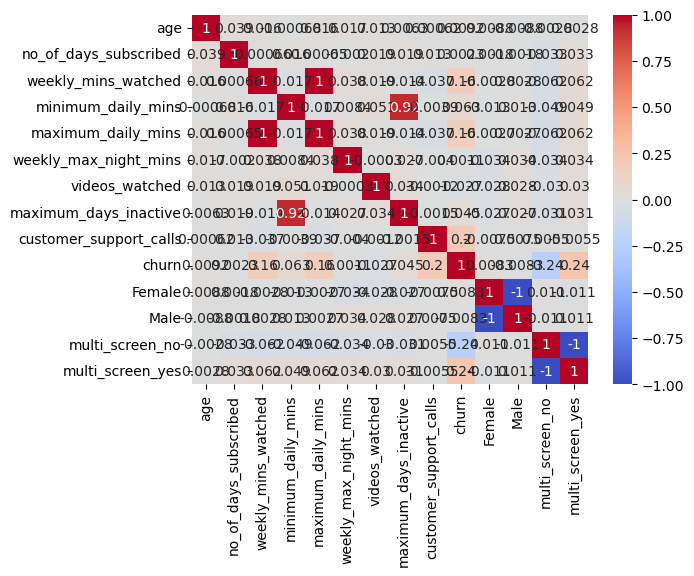

In [127]:
sns.heatmap(df5.corr(), annot=True, cmap='coolwarm')

<Axes: >

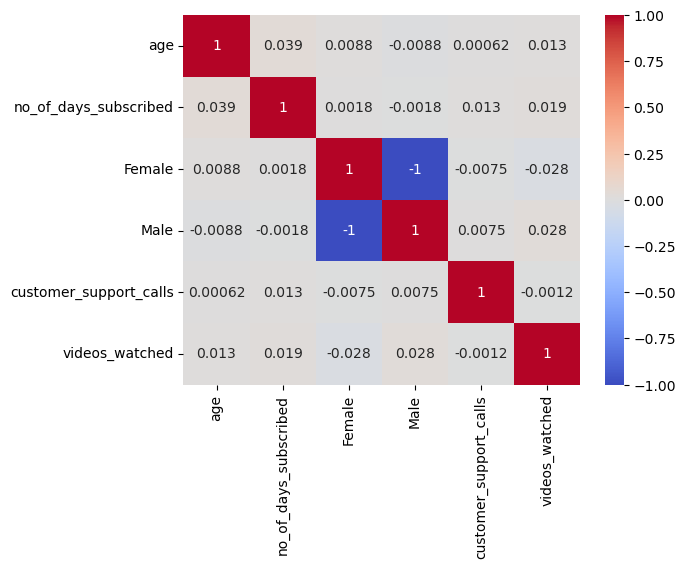

In [128]:
sns.heatmap(df6.corr(), annot=True, cmap='coolwarm')

<Axes: >

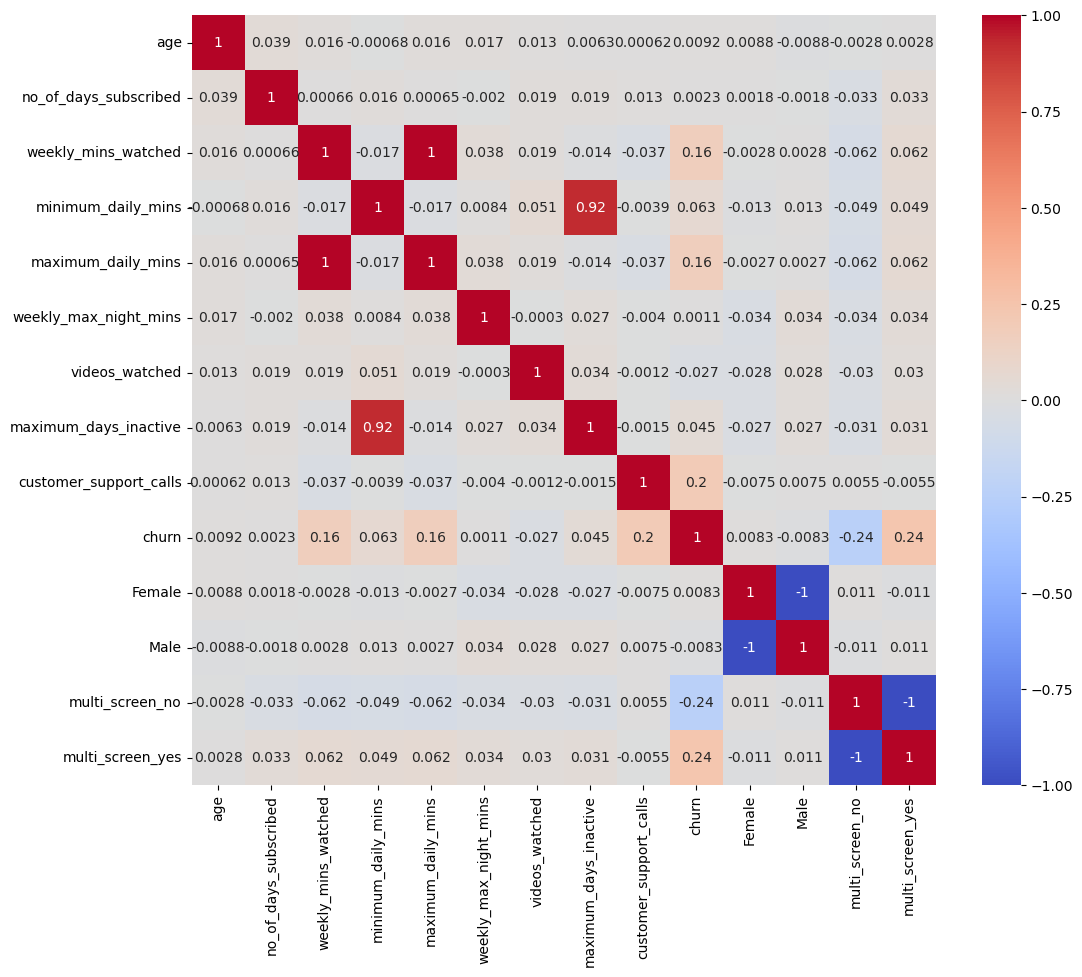

In [130]:
plt.figure(figsize=(12, 10))
sns.heatmap(df5.corr(), annot=True, cmap='coolwarm')

In [131]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

## EDA

#### Exploratory Data Analysis

- Understanding the nature of the data
- Exploring or looking into the data from different perspective
- To get some insights about the data

#### Why is data so important?

- for prediction
- to get insights from the past to improve the future
- helps to make stories aroung the data to come to an outcome


#### Problem statement
- to find the underlying problem/issue

#### Data dictionary

- metadata : the data about the data

In [132]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

#### Data Dictionary

- 1- Year
- 2- Customer_id - unique id
- 3- Phone_no
- 4- Gender 
- 5- Age
- 6- No of days subscribed - the number of days since the subscription 
- 7- Multi screen - does the customer have a single/ multiple screen subscription
- 8- Mail subscription - customer receive mails or not
- 9- Weekly mins watched - number of minutes watched weekly
- 10- Minimum daily mins - minimum minutes watched
- 11- Maximum daily mins - maximum minutes watched
- 12- Weekly nights max mins - number of minutes watched at night time
- 13- Videos watched - total number of videos watched
- 14- Maximum_days_inactive - days since inactive
- 15- Customer support calls - number of customer support calls 
- 16- Churn - Yes/ No

#### Why is EDA important?

- TO get insights about the data
- TO clean and handle issues with the data
- TO get better understanding of the data - to understand the underlying problem, to understand the features/columns and the relationship between these features
- EDA is an important step before we can move to ML models

#### Steps in EDA

- Understand the shape of the data
- Basic information about the data - number of cols, names of cols, number of rows, datatype of the cols, null values in each col, ...
- Statistical summary of the data
- Check for null values
- Check for duplicate values
- Check for unique values
- Understand the numerical and categorical cols
- Treat/deal with with null data Or handle null data
- Distribution of the data
- Treatment of null values
- Treatment of duplicate values
- Treatment of unique values
- Co-relation
- Outliers detection and treatment
- Graphs
- Encoding